In [639]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  #using style FiveThirtyEight

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [640]:
#Importing the dataset

df=pd.read_csv("marketing_campaign.csv",sep="\t")

# look the dataset
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

A little bit of cleaning

In [641]:
# remove the columns - no need 

df.drop(columns=["ID","Dt_Customer"], inplace= True, axis=0)
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       635         88              546  ...                  7   
1          38        11          1                6  ...                  5   
2          26       426         49              127  ...                  4   
3          26        11          4               20  ...                  6   
4          94       173         43              118  ...                  5   
...       ...       ...        ...              ...  ...                ...   
2235       46       709         43              182  ...                  5   
2236       56       406          0               30  ...                  7   
2237       91       908         48              217  ...                  6   
2238        8       428         30              214  ...                  3   
2239       40        84          3               61  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 27 columns]

In [642]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [643]:
# check the missing value - Null 
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [644]:
# fix missing value in column Income / using group by Education and Marital Status / avg
missing=df.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
df["Income"].fillna(missing, inplace= True)


In [645]:
# let show the describe the numeric feature 
df.describe().round(2)

Year_Birth     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count     2240.00    2240.00  2240.00   2240.00  2240.00   2240.00    2240.00   
mean      1968.81   52248.75     0.44      0.51    49.11    303.94      26.30   
std         11.98   25039.98     0.54      0.54    28.96    336.60      39.77   
min       1893.00    1730.00     0.00      0.00     0.00      0.00       0.00   
25%       1959.00   35538.75     0.00      0.00    24.00     23.75       1.00   
50%       1970.00   51381.50     0.00      0.00    49.00    173.50       8.00   
75%       1977.00   68289.75     1.00      1.00    74.00    504.25      33.00   
max       1996.00  666666.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
count          2240.00          2240.00           2240.00  ...   
mean            166.95            37.53             27.06  ...   
std             225.72            54.63             41.28  ...   
min               0.00             0.00              0.00  ...   
25%              16.00             3.00              1.00  ...   
50%              67.00            12.00              8.00  ...   
75%             232.00            50.00             33.00  ...   
max            1725.00           259.00            263.00  ...   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count            2240.00       2240.00       2240.00       2240.00   
mean                5.32          0.07          0.07          0.07   
std                 2.43          0.26          0.26          0.26   
min                 0.00          0.00          0.00          0.00   
25%                 3.00          0.00          0.00          0.00   
50%                 6.00          0.00          0.00          0.00   
75%                 7.00          0.00          0.00          0.00   
max                20.00          1.00          1.00          1.00   

       AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
count       2240.00       2240.00   2240.00         2240.0     2240.0   
mean           0.06          0.01      0.01            3.0       11.0   
std            0.25          0.11      0.10            0.0        0.0   
min            0.00          0.00      0.00            3.0       11.0   
25%            0.00          0.00      0.00            3.0       11.0   
50%            0.00          0.00      0.00            3.0       11.0   
75%            0.00          0.00      0.00            3.0       11.0   
max            1.00          1.00      1.00            3.0       11.0   

       Response  
count   2240.00  
mean       0.15  
std        0.36  
min        0.00  
25%        0.00  
50%        0.00  
75%        0.00  
max        1.00  

[8 rows x 25 columns]

In [646]:
#check if there any duplication 
df.duplicated().sum()

182

In [647]:
# we have 182 duplication values, we should droping this values

df.drop_duplicates(inplace=True)

In [648]:
df = df[df['Year_Birth'] >= 1920]

In [649]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 2055 Rows and 27 columns


After cleaning the data, lets learn a little about our dataset.

In [650]:
for i in df.columns:
    if df[i].dtypes == 'O':
        print (f"We have the following unique values: {  df[i].unique()}  in column:  {i} ")

We have the following unique values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']  in column:  Education 
We have the following unique values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']  in column:  Marital_Status 


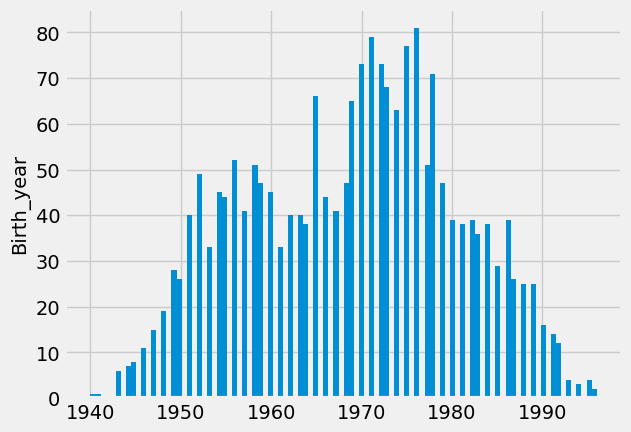

In [651]:
df["Year_Birth"].plot(kind="hist",bins=100)
plt.ylabel('Birth_year')
plt.show()

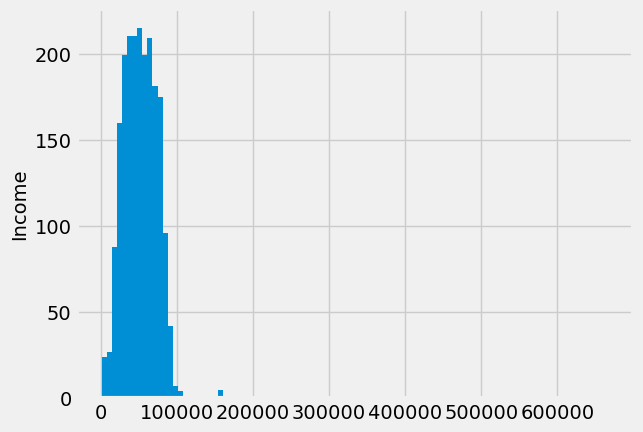

In [652]:

df["Income"].plot(kind="hist",bins=100)
plt.ylabel('Income')
plt.show()

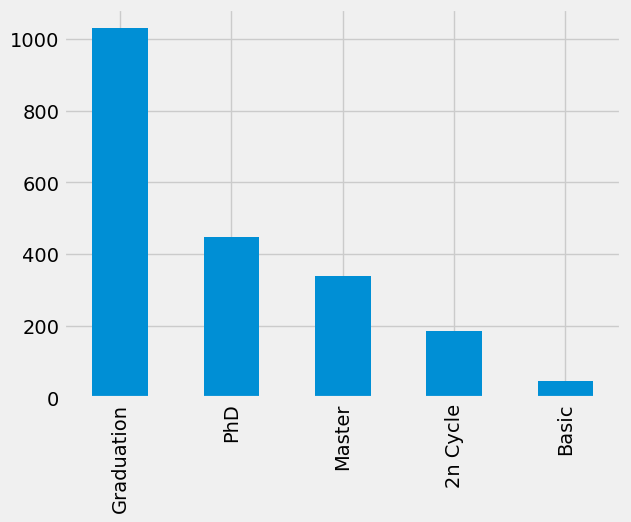

In [653]:
# what the common car in the dataset 

df["Education"].value_counts().plot(kind= "bar")
plt.show()

In [654]:
marital_status_counts = df["Marital_Status"].value_counts()
ax = marital_status_counts.plot(kind="bar")

plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")

# Adding the text on top of each bar
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, str(int(i.get_height())), ha='center', va='bottom')

plt.show()

Create a new column with all spendings called 'Spent'

In [655]:
# new column
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [656]:
#librarires for building model
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [657]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=df[num]   # new dataframe just type numeric
data_c=df[cat]  # new dataframe just type object
data_c

Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2233  Graduation       Together
2235  Graduation        Married
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2055 rows x 2 columns]

In [658]:
# make the dummies 
data_c_dummies = pd.get_dummies(data_c, drop_first=True)

In [659]:
# merge 2 data set 
frames = [data_c_dummies, data_n]
  
data = pd.concat(frames,axis=1)

data.columns


Index(['Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Spent'],
      dtype='object')

In [660]:
len(data.columns)

37

In [661]:
# bulid model using KMeans 
K = range(1, 10)

distortions = [sum(np.min(cdist(data, KMeans(n_clusters=k).fit(data).cluster_centers_, 'euclidean'), axis=1)) / data.shape[0] for k in K]
inertias = [KMeans(n_clusters=k).fit(data).inertia_ for k in K]
mapping1 = {k: distortion for k, distortion in zip(K, distortions)}
mapping2 = {k: inertia for k, inertia in zip(K, inertias)}

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 17961.350678817093
2 : 9848.053554056421
3 : 9525.099710833705
4 : 6844.283362651677
5 : 5450.478002111846
6 : 5051.750825863224
7 : 4077.2802108492956
8 : 3547.239873549778
9 : 3160.2911696139713


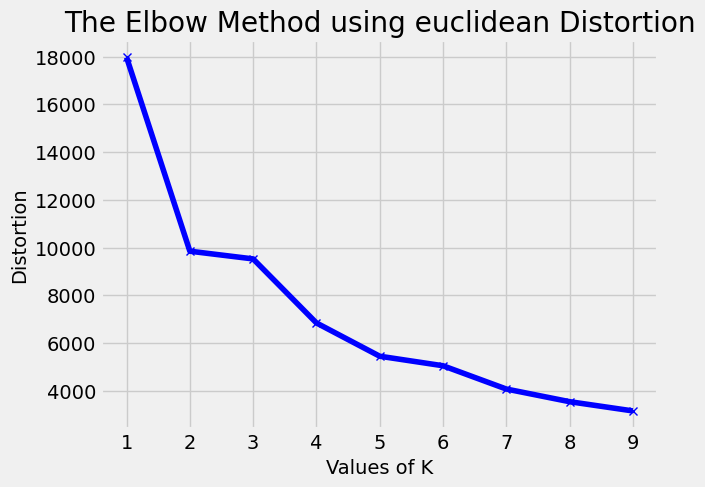

In [662]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using euclidean Distortion')
plt.show()

In [663]:
data

Education_Basic  Education_Graduation  Education_Master  Education_PhD  \
0                   0                     1                 0              0   
1                   0                     1                 0              0   
2                   0                     1                 0              0   
3                   0                     1                 0              0   
4                   0                     0                 0              1   
...               ...                   ...               ...            ...   
2233                0                     1                 0              0   
2235                0                     1                 0              0   
2237                0                     1                 0              0   
2238                0                     0                 1              0   
2239                0                     0                 0              1   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   
...                    ...                      ...                     ...   
2233                     0                        0                       0   
2235                     0                        0                       1   
2237                     0                        1                       0   
2238                     0                        0                       0   
2239                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         0                        1                     0   
3                         0                        1                     0   
4                         0                        0                     0   
...                     ...                      ...                   ...   
2233                      0                        1                     0   
2235                      0                        0                     0   
2237                      0                        0                     0   
2238                      0                        1                     0   
2239                      0                        0                     0   

      ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0     ...             0             0             0             0   
1     ...             0             0             0             0   
2     ...             0             0             0             0   
3     ...             0             0             0             0   
4     ...             0             0             0             0   
...   ...           ...           ...           ...           ...   
2233  ...             0             0             0             0   
2235  ...             0             0             0             0   
2237  ...             0             1             0             0   
2238  ...             0             0             0             0   
2239  ...             0             0             0             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Spent  
0                0         0              3         11         1   1617  
1                0         0              3         11         0     27  
2                0         0              3         11         0    776  
3                0         0      

- I prefer using 4 clusters

In [664]:
import numpy as np

def k_means_from_scratch(X, k, max_iters=100, tol=1e-5):
    # Randomly choosing Centroids 
    np.random.seed(42)  # Seed for reproducibility
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k]]
    
    for iteration in range(max_iters):
        # Cluster Assignment step
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster_ids = np.argmin(distances, axis=0)
        
        # Update Centroids step
        new_centroids = np.array([X[closest_cluster_ids == k].mean(axis=0) for k in range(centroids.shape[0])])
        
        # Convergence Check
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        
        centroids = new_centroids
    
    return closest_cluster_ids, centroids

# Prepare data (assuming 'data' is a NumPy array or a DataFrame that converts easily)
data_np = data.to_numpy() if isinstance(data, pd.DataFrame) else data


# Apply the K-Means algorithm
cluster_ids, final_centroids = k_means_from_scratch(data_np, k=4)

# Adding the cluster IDs back to the original DataFrame
df['Clusters'] = cluster_ids


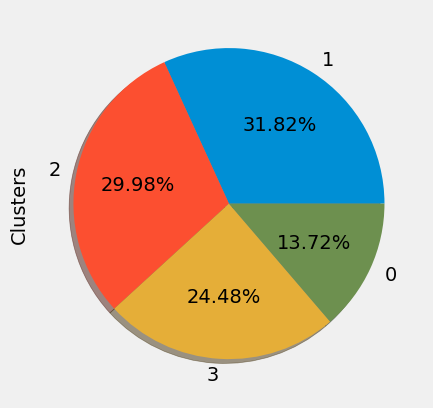

In [665]:
# show the new clusters 

df["Clusters"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

In [666]:
# let`s show the spent column with income column and the clusters 
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters")
plt.show()

Enhancing K-Means Clustering with PCA
When K-Means clustering continually creates small clusters regardless of the number of centroids, it may indicate challenges caused by high-dimensional data or significant outlier influence. PCA (Principal Component Analysis) can effectively address these issues:

Dimensionality Reduction: PCA reduces the number of dimensions by focusing on the primary directions where the data varies the most. This simplifies the data structure and improves the distance calculations central to K-Means, enhancing cluster quality.

Improved Cluster Quality: By concentrating on principal components with the highest variance, PCA minimizes the impact of noise and outliers, which often skew the mean calculations in K-Means. This leads to more distinct and meaningful clusters.

Computational Efficiency: Lower-dimensional data results in faster computation and more stable clustering, making the combined use of PCA and K-Means especially powerful for handling complex datasets.

Using PCA prior to K-Means and other clustering methods can therefore lead to better-defined clusters by making the clustering process more robust to the typical issues of high dimensionality and outlier sensitivity. This method not only streamlines clustering tasks but also enhances the interpretability of the results.

In [667]:
def pca_from_scratch(df, num_components):
    # Drop non-numeric columns if any
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Step 1: Standardize the data (mean = 0 and variance = 1)
    X_meaned = numeric_df - np.mean(numeric_df, axis=0)
    
    # Step 2: Compute the covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    
    # Step 4: Sort the eigenvalues and corresponding eigenvectors in decreasing order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    # Step 5: Select the first num_components eigenvectors to form the projection matrix
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced


In [668]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
reduced_data = pca_from_scratch(data, num_components=1)
reduced_data_scaled = scaler.fit_transform(reduced_data)
reduced_data_scaled


array([[ 0.22890278],
       [-0.23691488],
       [ 0.75899868],
       ...,
       [ 0.18310617],
       [ 0.66578483],
       [ 0.02021545]])

In [669]:
cluster_ids, final_centroids = k_means_from_scratch(reduced_data_scaled,4)
df["Clusters2"] = cluster_ids
df["Clusters2"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)


<Axes: ylabel='Clusters2'>

In [670]:
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters2")
plt.show()

this pie and scatter plots look very similar to our fully dimentioned plots.
lets check how different the two are exactly

In [671]:
df["is_different"]= df['Clusters']!=df['Clusters2']
different_accurences =df["is_different"].agg('sum')
different_accurences

3

We have almost fully copied the results of a 32-dimentional K-means algorithm with only one dimention. probably because this dataset is a "toy-dataset" artificially made, probably with those exact methods.

In [672]:
df.drop('is_different',axis=1)

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0           1957  Graduation         Single   58138.0        0         0   
1           1954  Graduation         Single   46344.0        1         1   
2           1965  Graduation       Together   71613.0        0         0   
3           1984  Graduation       Together   26646.0        1         0   
4           1981         PhD        Married   58293.0        1         0   
...          ...         ...            ...       ...      ...       ...   
2233        1977  Graduation       Together  666666.0        1         0   
2235        1967  Graduation        Married   61223.0        0         1   
2237        1981  Graduation       Divorced   56981.0        0         0   
2238        1956      Master       Together   69245.0        0         1   
2239        1954         PhD        Married   52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp5  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2233       23         9         14               18  ...             0   
2235       46       709         43              182  ...             0   
2237       91       908         48              217  ...             0   
2238        8       428         30              214  ...             0   
2239       40        84          3               61  ...             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0                0             0         0              3         11   
1                0             0         0              3         11   
2                0             0         0              3         11   
3                0             0         0              3         11   
4                0             0         0              3         11   
...            ...           ...       ...            ...        ...   
2233             0             0         0              3         11   
2235             0             0         0              3         11   
2237             0             0         0              3         11   
2238             0             0         0              3         11   
2239             0             0         0              3         11   

      Response  Spent  Clusters  Clusters2  
0            1   1617         2          2  
1            0     27         1          1  
2            0    776         2          2  
3            0     53         3          3  
4            0    422         2          2  
...        ...    ...       ...        ...  
2233         0     62         0          0  
2235         0   1341         2          2  
2237         0   1241         2          2  
2238         0    843         2          2  
2239         1    172         1          1  

[2055 rows x 30 columns]

In order to check this theory, lets use a different clustering approach. the PCA should help build a more refined model as well as more power and time effieciend process.
we'll use a Gaussian Mixture clustering model

In customer segmentation, a Gaussian Mixture Model (GMM) is often preferred over K-means due to its flexibility and accuracy:

    Cluster Shape: Unlike K-means, which assumes spherical clusters of equal size, GMMs handle elliptical and variably sized clusters better, adapting to the complex shapes found in diverse  customer data.

    Soft Clustering: GMM allows customers to belong to multiple segments with varying probabilities, offering a more nuanced view of overlapping customer behaviors, ideal for targeted marketing strategies.
    
    Robustness to Outliers: GMMs are more tolerant of outliers, as they reduce the impact of outliers by incorporating them probabilistically, rather than allowing them to skew the centroids as in K-means.

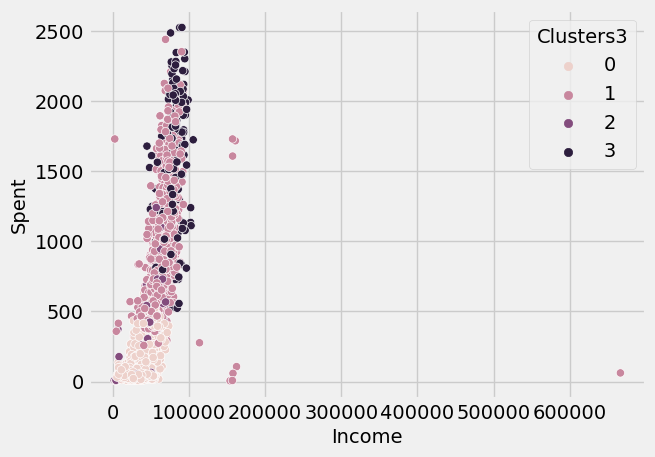

<Axes: ylabel='Clusters3'>

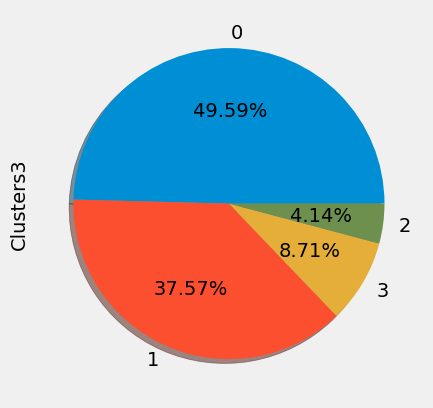

In [673]:

from sklearn.mixture import GaussianMixture


# Fit GMM
gmm = GaussianMixture(n_components=4, random_state=42,)
gmm_labels = gmm.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
df['Clusters3'] = gmm_labels

# Scatter plot
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters3")
plt.show()
df["Clusters3"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)



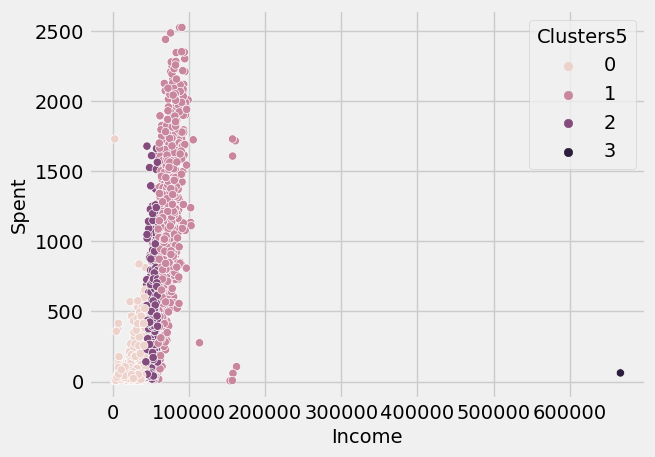

<Axes: ylabel='Clusters5'>

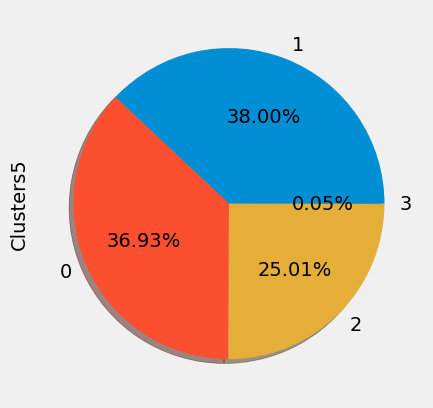

In [679]:


# Fit GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data_scaled)

# Add cluster labels to the DataFrame
df['Clusters5'] = gmm_labels

# Scatter plot
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters5")
plt.show()
df["Clusters5"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  Spent  Clusters  Clusters2  \
0       635         88              546  ...   1617         2          2   
1        11          1                6  ...     27         1          1   
2       426         49              127  ...    776         2          2   
3        11          4               20  ...     53         3          3   
4       173         43              118  ...    422         2          2   

   is_different  Clusters3  Clusters5  Cluster 1  Cluste

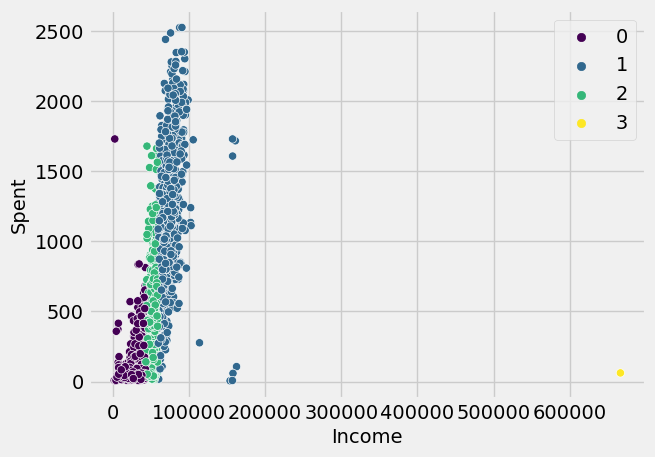

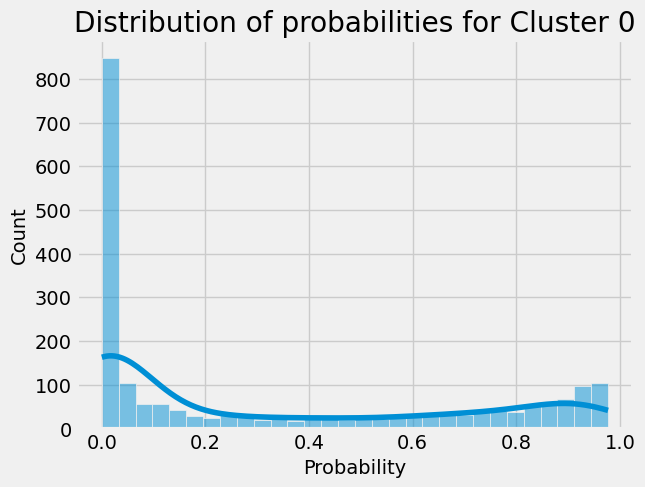

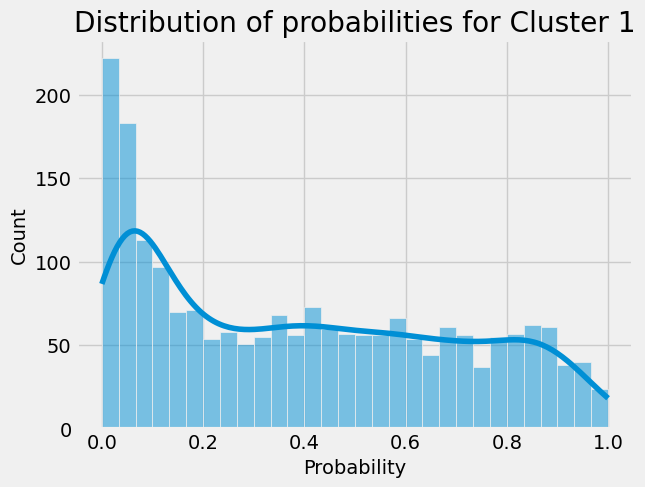

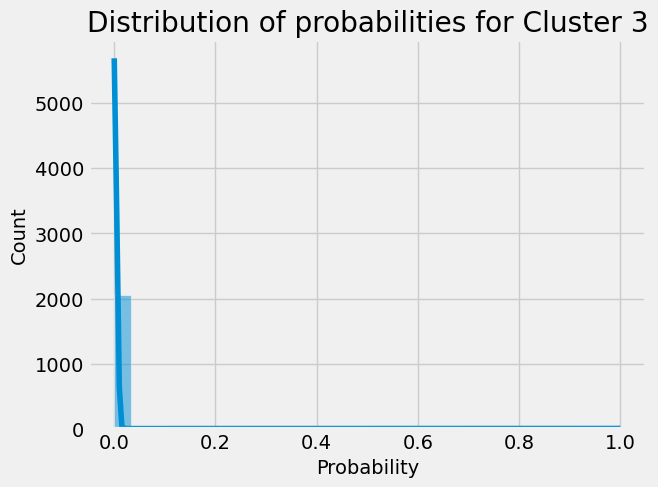

In [675]:
gmm.fit(reduced_data_scaled)

# Obtain the probabilities for each point belonging to each cluster
cluster_probs = gmm.predict_proba(reduced_data_scaled)

# Reset index in case 'df' has been manipulated elsewhere in your code
df.reset_index(drop=True, inplace=True)

# Convert cluster probabilities to a DataFrame
prob_df = pd.DataFrame(cluster_probs, columns=[f'Cluster {i+1}' for i in range(4)])

# Concatenate the original DataFrame with the new probabilities DataFrame
df = pd.concat([df, prob_df], axis=1)

# Verify DataFrame concatenation
print(df.head())

# Create a scatter plot colored by the highest probability of cluster membership
max_prob_clusters = np.argmax(cluster_probs, axis=1)
sns.scatterplot(data=df, x="Income", y="Spent", hue=max_prob_clusters, palette='viridis')
plt.show()
# Pie chart
plt.show()  # Display the plot
# Plotting distributions for each cluster probability
for i in range(4):
    sns.histplot(data=prob_df, x=f'Cluster {i+1}', bins=30, kde=True)
    plt.title(f'Distribution of probabilities for Cluster {i}')
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.show()


<Axes: title={'center': 'Cluster Distribution'}, ylabel='Most Probable Cluster'>

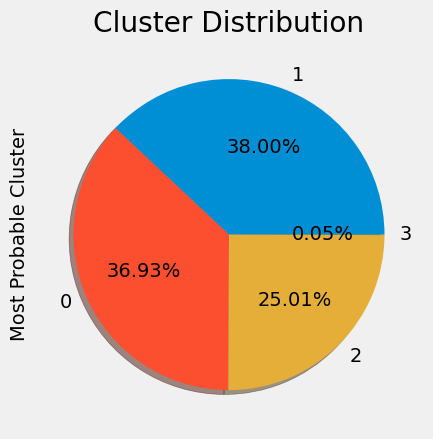

In [676]:
df['Most Probable Cluster'] = np.argmax(cluster_probs, axis=1)  # Add a column for the most probable cluster
df['Most Probable Cluster'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, title='Cluster Distribution')  

And as we can see the PCA did help create a more elegant clustering plot. it didnt agree to put the outliers in a different group, therfor creaing a very small group

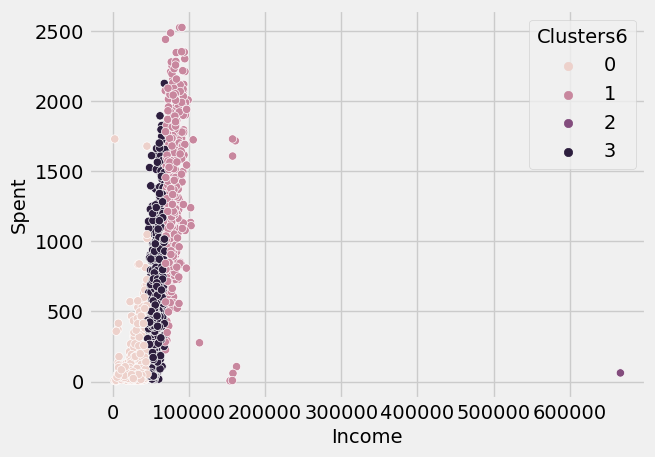

<Axes: ylabel='Clusters6'>

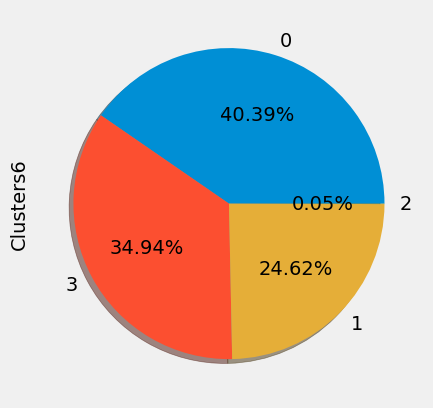

In [677]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Compute the linkage matrix
Z = linkage(reduced_data_scaled, method='ward')

# Fit Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(reduced_data_scaled)
df['Clusters6'] = hc_labels

# Scatter plot
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters6")
plt.show()
df["Clusters6"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)

In order to create a more evenly densed groups we'll harness connectivity.
Connectivity — Points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together. Spectral Clustering is a technique that follows this approach.

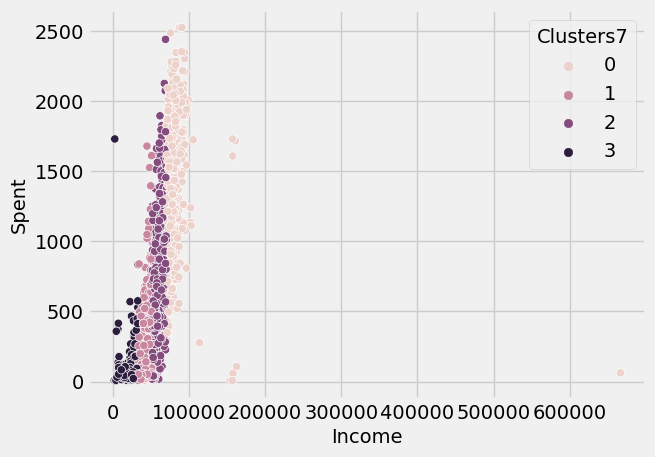

<Axes: ylabel='Clusters7'>

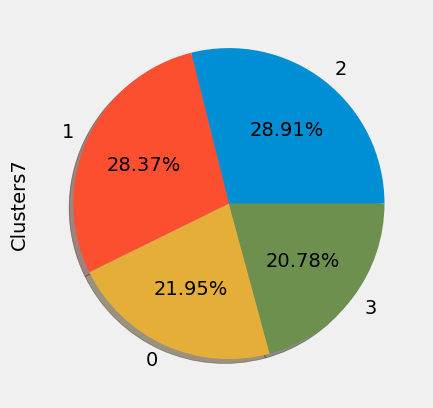

In [678]:
from sklearn.cluster import SpectralClustering
# Fit Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(reduced_data_scaled)
df['Clusters7'] = spectral_labels
sns.scatterplot(df, x="Income", y= "Spent",hue="Clusters7")
plt.show()
df["Clusters7"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)